In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Dataset Files
- `calendar.csv` - Contains information about the dates on which the products are sold.
- `sales_train_validation.csv` - Contains the historical daily unit sales data per product and store [d_1 - d_1913]
- `sell_prices.csv` - Contains information about the price of the products sold per store and date.
- `sales_train_evaluation.csv` - Available one month before competition deadline. Will include sales [d_1 - d_1941]
- `sample_submission.csv` - Submission for the 28 days ahead forecast

In [2]:
os.listdir("dataset/")

['calendar.csv',
 'sales_train_evaluation.csv',
 'sales_train_validation.csv',
 'sample_submission.csv',
 'sell_prices.csv']

In [3]:
# loading the dataset files
cal = pd.read_csv('dataset/calendar.csv')

In [4]:
print(cal.shape)
cal.head(10)

(1969, 17)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,Unnamed: 14,hobby,household
0,29-01-2011,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN
1,30-01-2011,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN
2,31-01-2011,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN
3,01-02-2011,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,NaN,NaN,NaN
4,02-02-2011,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,NaN,NaN,NaN
5,03-02-2011,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN
6,04-02-2011,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN,NaN
7,05-02-2011,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN
8,06-02-2011,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1,1.0,0.0,0.0
9,07-02-2011,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0,NaN,NaN,NaN


In [5]:
stv = pd.read_csv('dataset/sales_train_validation.csv')

In [6]:
print(stv.shape)
stv.head(10)

(30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,1,0,0,1,4,0,0,0,1,0,1,0,0,0,2,0,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,0,4,6,5,7,0,13,2,2,20,9,3,0,1,0,...,2,12,38,22,2,0,10,26,8,12,4,5,2,8,4,0,0,1,37,3,4,6,3,2,1
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,0,2,3,9,0,0,4,3,1,0,4,4,1,2,0,...,1,2,0,3,0,0,0,0,0,1,1,0,7,0,0,0,0,1,1,6,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,...,1,1,0,3,2,2,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,2


In [7]:
ste = pd.read_csv('dataset/sales_train_evaluation.csv')

In [8]:
print(ste.shape)
ste.head()

(30490, 1947)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


We are given historic sales data in the `sales_train_validation` dataset.
- rows exist in this dataset for days d_1 to d_1913. We are given the department, category, state, and store id of the item.
- d_1914 - d_1941 represents the `validation` rows which we will predict in stage 1
- d_1942 - d_1969 represents the `evaluation` rows which we will predict for the final competition standings.

In [9]:
ss = pd.read_csv('dataset/sample_submission.csv')

In [10]:
print(ss.shape)
ss.head(10)

(60980, 29)


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,HOBBIES_1_006_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,HOBBIES_1_007_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,HOBBIES_1_008_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,HOBBIES_1_009_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Our Aim
We are trying to predict forecast sales for the next 28 forecast days. The sample submission has the following format:
- The columns represent 28 forecast days. We will fill these forecast days with our predictions.
- The rows each represent a specific item. This id tells us the item type, state, and store.

In [11]:
sellp = pd.read_csv('dataset/sell_prices.csv')

In [12]:
print(sellp.shape)
sellp.head(10)

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
5,CA_1,HOBBIES_1_001,11330,8.26
6,CA_1,HOBBIES_1_001,11331,8.26
7,CA_1,HOBBIES_1_001,11332,8.26
8,CA_1,HOBBIES_1_001,11333,8.26
9,CA_1,HOBBIES_1_001,11334,8.26


In [13]:
# visualizing data for a singe item

day_cols = [col for col in stv.columns if 'd_' in col]
print("Total number of days for training ", len(day_cols))
print("-----------------------------------------")
print("Starting 10 days \n", day_cols[:10])
print("-----------------------------------------")
print("Last 10 days \n", day_cols[-10:])

Total number of days for training  1913
-----------------------------------------
Starting 10 days 
 ['d_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10']
-----------------------------------------
Last 10 days 
 ['d_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910', 'd_1911', 'd_1912', 'd_1913']


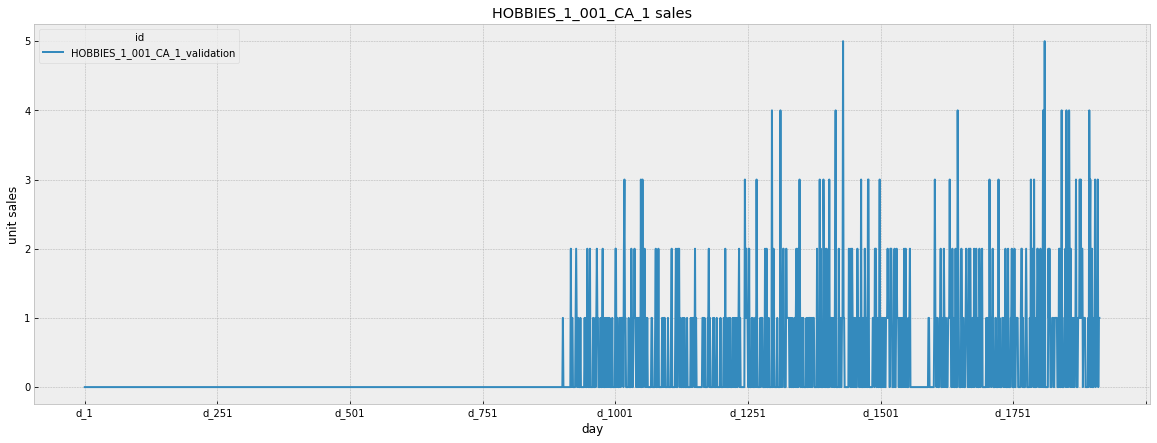

In [14]:
'''
for item : 'HOBBIES_1_001_CA_1_validation'
just select the id as the index and the sales for the 1913 days
'''
stv.loc[stv['id'] == 'HOBBIES_1_001_CA_1_validation'] \
    .set_index('id')[day_cols].T \
    .plot(figsize = (20, 7), title = "HOBBIES_1_001_CA_1 sales",
          color = next(color_cycle))
plt.ylabel('unit sales')
plt.xlabel('day')
plt.show()

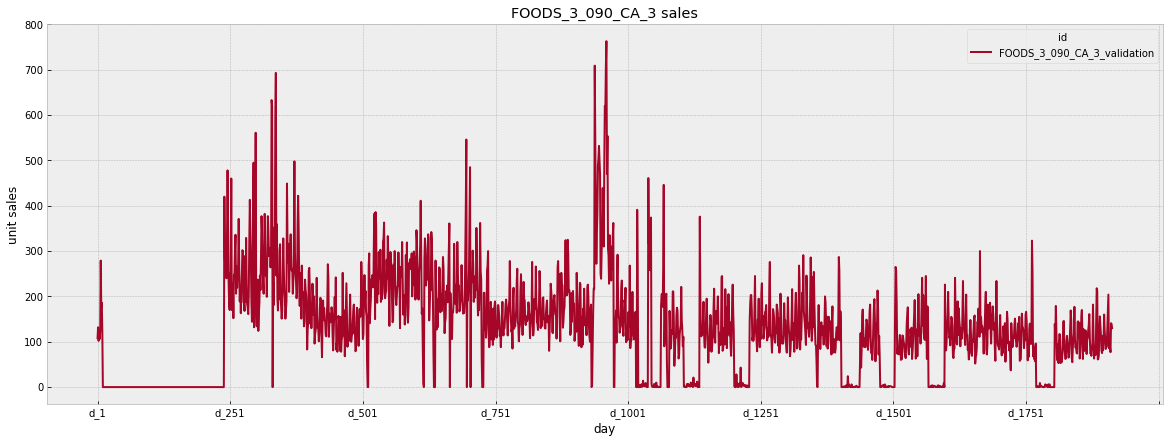

In [15]:
stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'] \
    .set_index('id')[day_cols].T \
    .plot(figsize = (20, 7), title = "FOODS_3_090_CA_3 sales",
          color = next(color_cycle))
plt.ylabel('unit sales')
plt.xlabel('day')
plt.show()

## Merging the data with real dates
- We are given a calendar with additional information about past and future dates.
- The calendar data can be merged with our days data
- From this we can find weekly and annual trends

In [16]:
cols = ['d','date','event_name_1','event_name_2','event_type_1','event_type_2', 'snap_CA']
cal[cols].head()

,d,date,event_name_1,event_name_2,event_type_1,event_type_2,snap_CA
0,d_1,29-01-2011,NaN,NaN,NaN,NaN,0
1,d_2,30-01-2011,NaN,NaN,NaN,NaN,0
2,d_3,31-01-2011,NaN,NaN,NaN,NaN,0
3,d_4,01-02-2011,NaN,NaN,NaN,NaN,1
4,d_5,02-02-2011,NaN,NaN,NaN,NaN,1


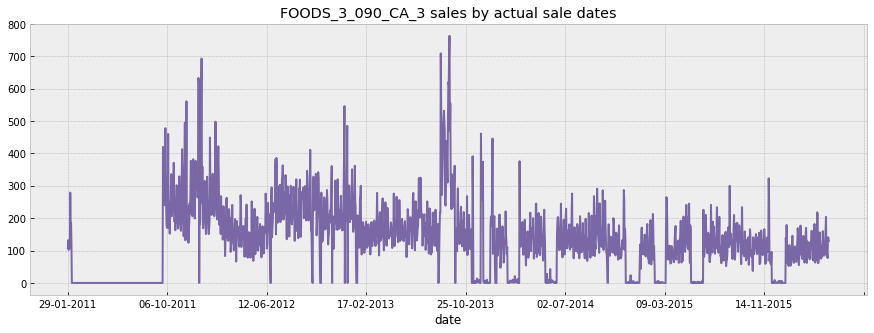

In [17]:
# Merge calendar on our items' data
example = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'][day_cols].T
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) # Name it correctly
example = example.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example = example.merge(cal, how='left', validate='1:1')
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

# Select more top selling examples
example2 = stv.loc[stv['id'] == 'HOBBIES_1_234_CA_3_validation'][day_cols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'}) 
example2 = example2.reset_index().rename(columns={'index': 'd'}) 
example2 = example2.merge(cal, how='left', validate='1:1')

example3 = stv.loc[stv['id'] == 'HOUSEHOLD_1_118_CA_3_validation'][day_cols].T
example3 = example3.rename(columns={6776:'HOUSEHOLD_1_118_CA_3'})
example3 = example3.reset_index().rename(columns={'index': 'd'})
example3 = example3.merge(cal, how='left', validate='1:1')

# Getting narrower results
- Day of the week
- Month 
- Year

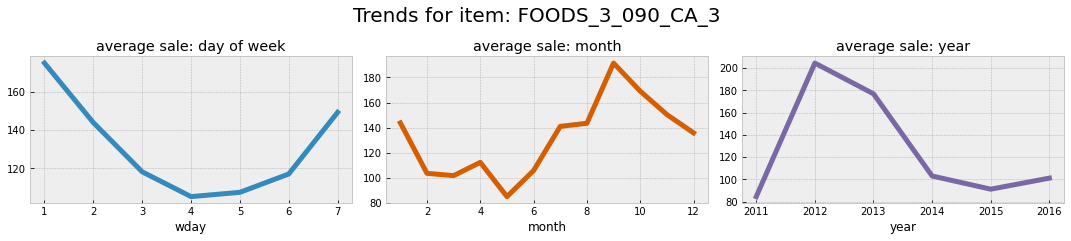

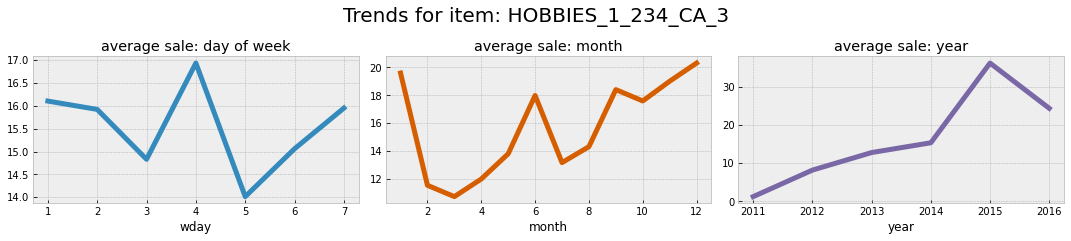

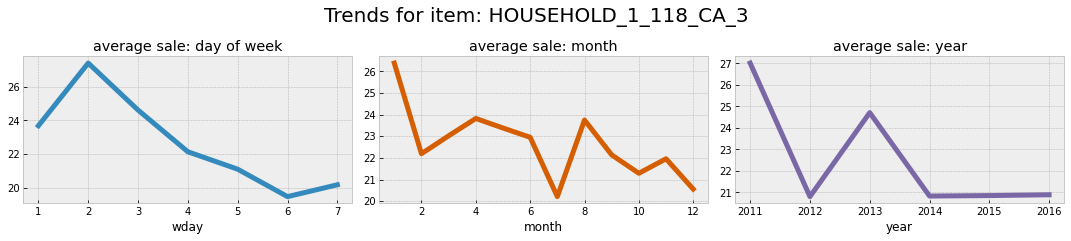

In [18]:
examples = ['FOODS_3_090_CA_3','HOBBIES_1_234_CA_3','HOUSEHOLD_1_118_CA_3']
example_df = [example, example2, example3]
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    example_df[i].groupby('wday').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    example_df[i].groupby('month').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: month',
              lw=5,
              color=color_pal[4],

              ax=ax2)
    example_df[i].groupby('year').mean()[examples[i]] \
        .plot(kind='line',
              lw=5,
              title='average sale: year',
              color=color_pal[2],

              ax=ax3)
    fig.suptitle(f'Trends for item: {examples[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

In [19]:
# plotting 10 items to notice some trends
ten_examples = stv.sample(10, random_state=529) \
        .set_index('id')[day_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

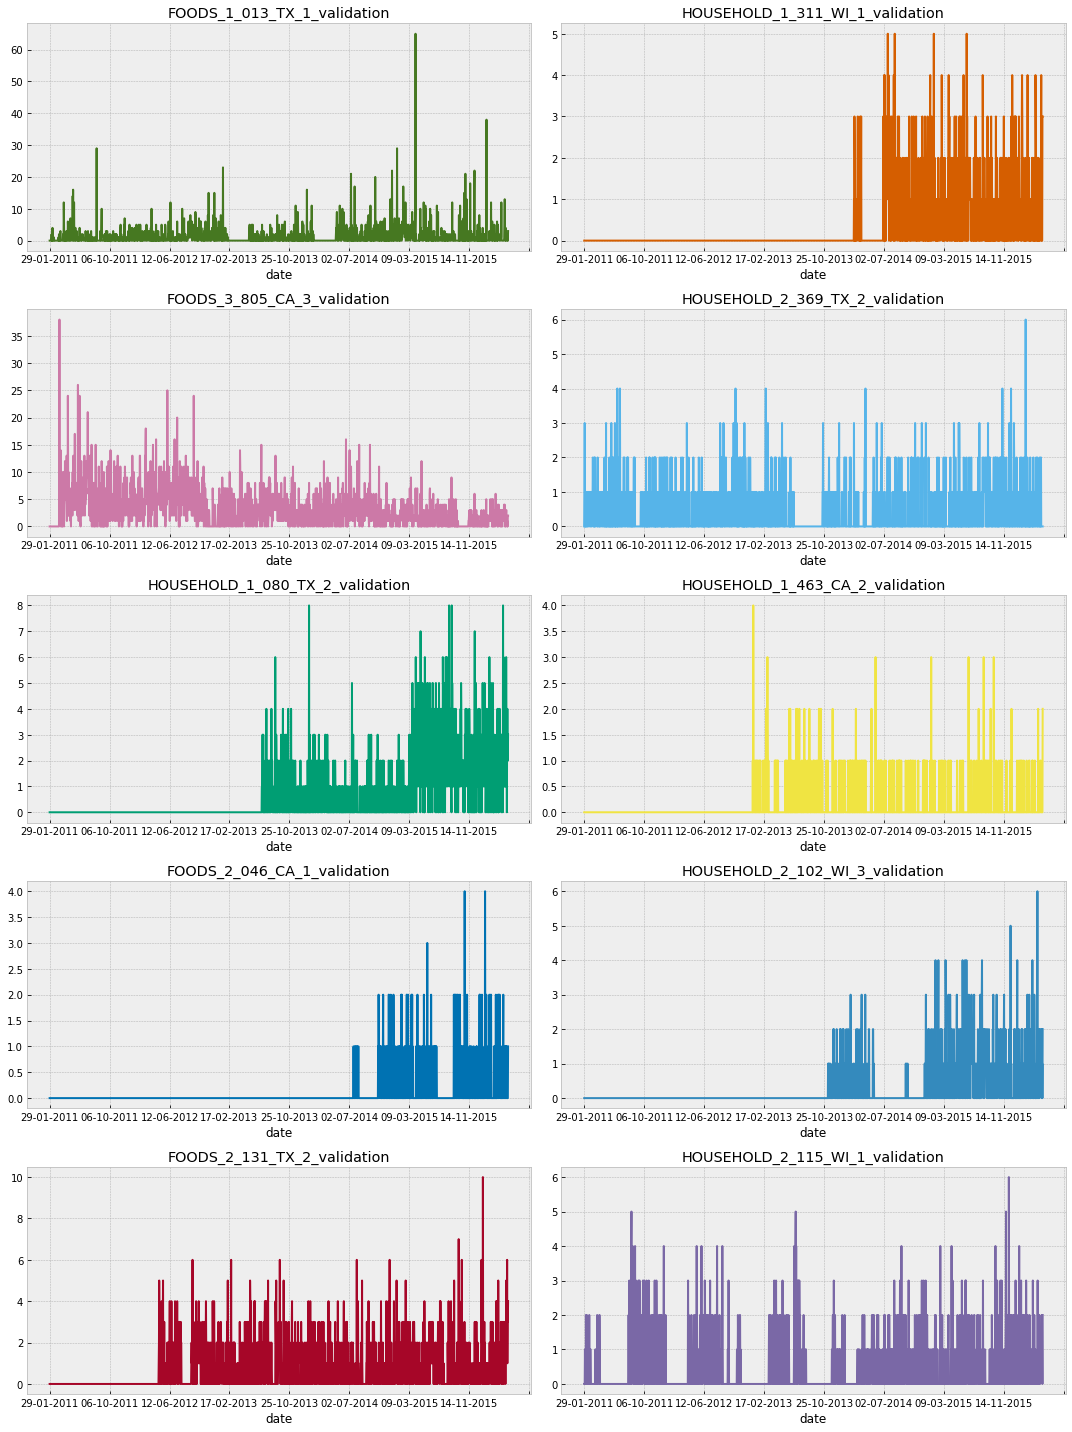

In [20]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in ten_examples.columns:
    ten_examples[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

# Some Observations
- Some items are unavailable for certain durations of time
- There is a huge range difference in the sales of items
- for some items max sales is 6 while for some it is 800
- there are occasional spikes in the sales
- this could be due to weekends or some special events.
- drop in the sales price could also account for the same.

## Combined Sales over time by Product Category

In [21]:
# in our dataset we could observe that there are 3 product categories
stv['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

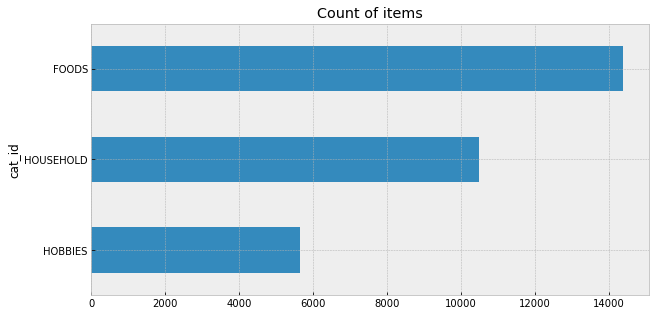

In [22]:
p = stv.groupby('cat_id').count()['id'].sort_values()
p.plot(kind = 'barh', figsize = (10, 5), title = "Count of items")
plt.show()

In [23]:
# lets plot the sales of these items category wise
sales = stv.set_index('id')[day_cols].T
sales = sales.merge(cal.set_index('d')['date'], left_index = True, right_index = True, validate = '1:1')
sales = sales.set_index('date')

In [40]:
sales.shape

(1913, 30490)

In [41]:
sales.head(10)

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,HOBBIES_1_011_CA_1_validation,HOBBIES_1_012_CA_1_validation,HOBBIES_1_013_CA_1_validation,HOBBIES_1_014_CA_1_validation,HOBBIES_1_015_CA_1_validation,HOBBIES_1_016_CA_1_validation,HOBBIES_1_017_CA_1_validation,HOBBIES_1_018_CA_1_validation,HOBBIES_1_019_CA_1_validation,HOBBIES_1_020_CA_1_validation,HOBBIES_1_021_CA_1_validation,HOBBIES_1_022_CA_1_validation,HOBBIES_1_023_CA_1_validation,HOBBIES_1_024_CA_1_validation,HOBBIES_1_025_CA_1_validation,...,FOODS_3_803_WI_3_validation,FOODS_3_804_WI_3_validation,FOODS_3_805_WI_3_validation,FOODS_3_806_WI_3_validation,FOODS_3_807_WI_3_validation,FOODS_3_808_WI_3_validation,FOODS_3_809_WI_3_validation,FOODS_3_810_WI_3_validation,FOODS_3_811_WI_3_validation,FOODS_3_812_WI_3_validation,FOODS_3_813_WI_3_validation,FOODS_3_814_WI_3_validation,FOODS_3_815_WI_3_validation,FOODS_3_816_WI_3_validation,FOODS_3_817_WI_3_validation,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29-01-2011,0,0,0,0,0,0,0,12,2,0,0,0,0,0,4,5,0,0,0,0,0,2,2,0,0,...,0,14,0,0,7,4,0,0,0,0,0,0,0,0,0,0,14,1,0,4,0,0,0,0,0
30-01-2011,0,0,0,0,0,0,0,15,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,...,0,7,0,0,6,13,0,0,0,4,0,0,0,0,1,0,11,1,0,4,0,0,6,0,0
31-01-2011,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,...,0,6,0,0,9,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,2,0,0,0,0
01-02-2011,0,0,0,0,0,0,0,0,3,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,...,0,9,0,0,1,1,0,0,0,1,0,0,0,0,1,0,6,1,0,5,2,0,2,0,0
02-02-2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,2,0,0,...,0,0,0,0,6,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,0,0,2,0,0
03-02-2011,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,32,0,0,0,0,0,0,1,0,0,...,0,14,0,0,11,0,0,0,0,2,0,0,0,0,1,0,13,2,0,7,3,5,4,0,0
04-02-2011,0,0,0,0,0,0,0,6,3,0,0,0,0,0,0,1,0,0,0,0,0,1,3,0,0,...,0,6,0,0,8,2,0,0,0,0,0,0,0,0,3,0,18,1,0,8,1,0,1,0,0
05-02-2011,0,0,0,0,0,0,0,5,9,0,0,2,0,0,0,5,0,0,0,0,0,1,7,0,0,...,0,12,0,0,10,4,0,0,0,2,0,0,0,0,1,0,13,3,0,4,4,1,8,0,0
06-02-2011,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,...,0,9,0,0,11,6,0,0,0,0,0,0,0,0,0,0,18,4,0,4,1,1,5,0,0


In [42]:
sales.index

Index(['29-01-2011', '30-01-2011', '31-01-2011', '01-02-2011', '02-02-2011',
       '03-02-2011', '04-02-2011', '05-02-2011', '06-02-2011', '07-02-2011',
       ...
       '15-04-2016', '16-04-2016', '17-04-2016', '18-04-2016', '19-04-2016',
       '20-04-2016', '21-04-2016', '22-04-2016', '23-04-2016', '24-04-2016'],
      dtype='object', name='date', length=1913)

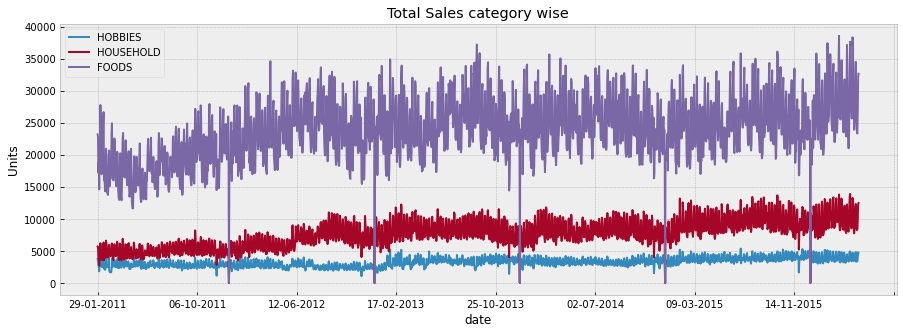

In [28]:
# lets plot it out
for i in stv['cat_id'].unique():
    col = [c for c in sales.columns if i in c]
    sales[col].sum(axis=1).plot(figsize = (15, 5), alpha = 1, title = 'Total Sales category wise')

plt.ylabel("Units")
plt.legend(stv['cat_id'].unique())
plt.show()

In [25]:
store_list = sellp['store_id'].unique()
len(store_list)

10

# Sales by Store

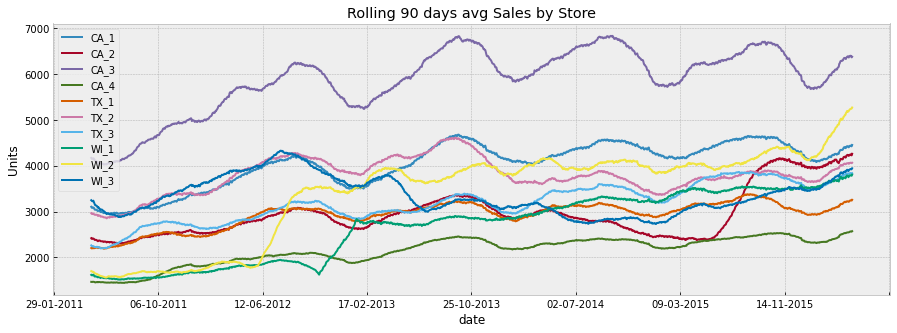

In [29]:
# there are 10 unique stores.
store_list = sellp['store_id'].unique()
for store in store_list:
    items = [i for i in sales.columns if store in i]
    sales[items].sum(axis = 1).rolling(90).mean().plot(figsize = (15, 5), alpha = 1, title = 'Rolling 90 days avg Sales by Store')

plt.ylabel("Units")
plt.legend(store_list)
plt.show()

In [30]:
# note
# there are some stores that are more steady ie. consistent than others
# in some stores we can notice bumps/spikes in between.
# this could be because of some special events.
# this pattern over the entire dataset is a very important thing to observe

# Demand Patterns over 7 days rolling average

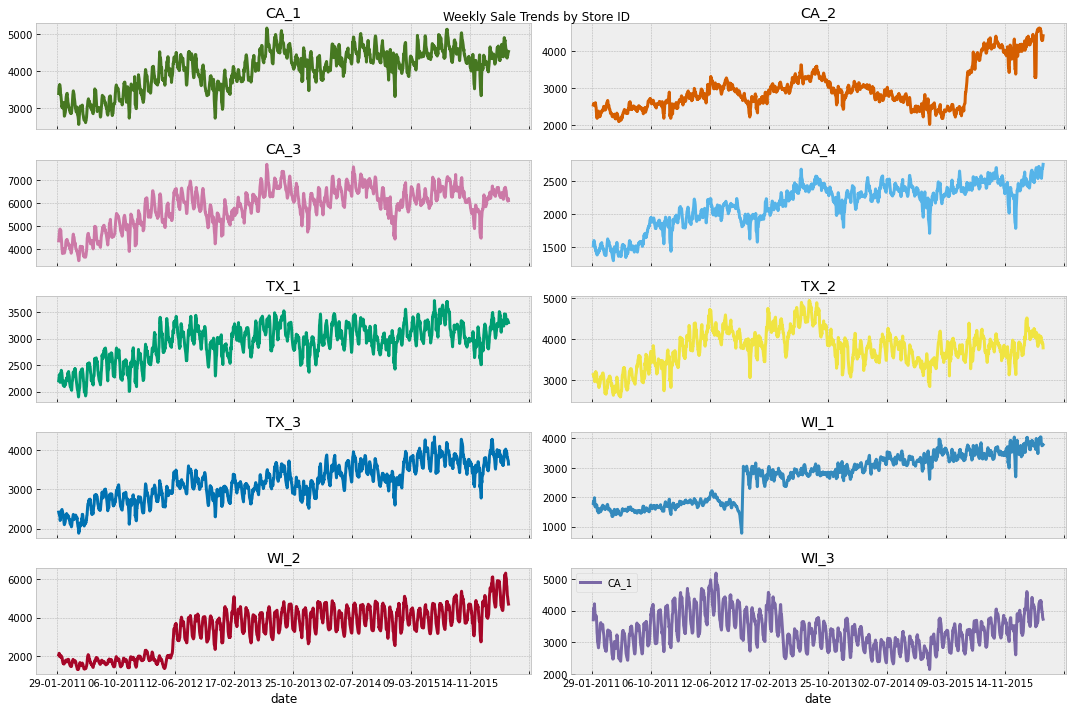

In [33]:
fig, axes = plt.subplots(5, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()
ax_idx = 0
for store in store_list:
    items = [c for c in sales.columns if store in c]
    sales[items].sum(axis=1).rolling(7).mean().plot(alpha = 1,ax = axes[ax_idx], title = store, lw=3, color=next(color_cycle))
    ax_idx += 1
    
plt.legend(store_list)
plt.suptitle('Weekly Sale Trends by Store ID')
plt.tight_layout()
plt.show()

Note: 
    Here we have plotted the 7 days rolling average, total demand count by store.
    We can observe that some stores have abrupt changes in  their demand, maybe the store expanded if there is an upward       spike else because of new competitors in the same domain, resulting in downward spike.


# Sales by Date

In [36]:
print('lowest sale date was:', sales.sum(axis=1).sort_values().index[0],
     'with', sales.sum(axis=1).sort_values().values[0], 'sales')
print('highest sale date was:', sales.sum(axis=1).sort_values(ascending=False).index[0],
     'with', sales.sum(axis=1).sort_values(ascending=False).values[0], 'sales')

lowest sale date was: 25-12-2012 with 11 sales
highest sale date was: 06-03-2016 with 57218 sales


In [43]:
# we can clearly observe that there is a huge difference in the unit product sales in a day.
# we need to scale these values

# Sales Prices

In [44]:
# we have the historical sale prices of each item.
# the item prize depends on the location of the store
# might be because of transportation / shipping charges

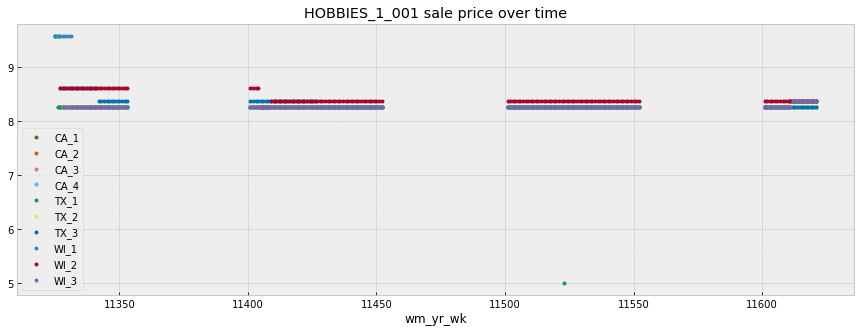

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
stores = []
for store, d in sellp.query('item_id == "HOBBIES_1_001"').groupby('store_id'):
    d.plot(x='wm_yr_wk',
          y='sell_price',
          style='.',
          color=next(color_cycle),
          figsize=(15, 5),
          title='HOBBIES_1_001 sale price over time',
           ax=ax,
          legend=store)
    stores.append(store)
    plt.legend()
plt.legend(stores)
plt.show()

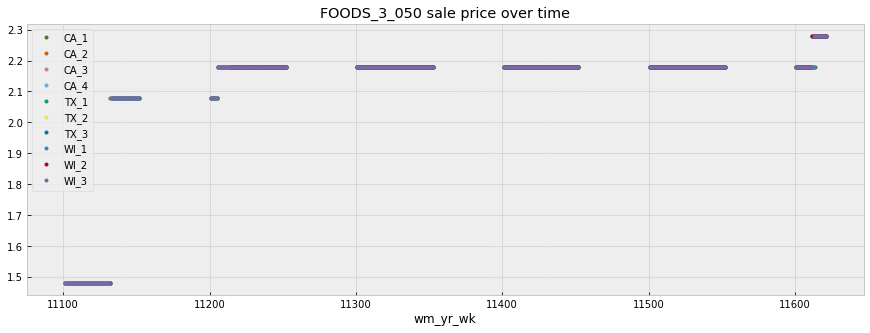

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))
stores = []
for store, d in sellp.query('item_id == "FOODS_3_050"').groupby('store_id'):
    d.plot(x='wm_yr_wk',
          y='sell_price',
          style='.',
          color=next(color_cycle),
          figsize=(15, 5),
          title='FOODS_3_050 sale price over time',
           ax=ax,
          legend=store)
    stores.append(store)
    plt.legend()
plt.legend(stores)
plt.show()

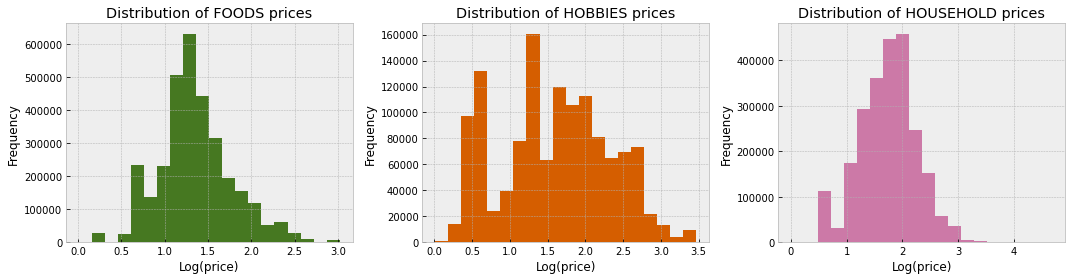

In [47]:
sellp['Category'] = sellp['item_id'].str.split('_', expand=True)[0]
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
i = 0
for cat, d in sellp.groupby('Category'):
    ax = d['sell_price'].apply(np.log1p) \
        .plot(kind='hist',
                         bins=20,
                         title=f'Distribution of {cat} prices',
                         ax=axs[i],
                                         color=next(color_cycle))
    ax.set_xlabel('Log(price)')
    i += 1
plt.tight_layout()

# Naive Approach

In [54]:
# take the average of the sales over the previous 30 days window to predict the current sell price
avg_30 = stv.set_index('id')[day_cols[-30 : ]].mean(axis = 1).to_dict()

In [55]:
len(avg_30)

30490

In [58]:
avg_30

{'HOBBIES_1_001_CA_1_validation': 0.9666666666666667,
 'HOBBIES_1_002_CA_1_validation': 0.13333333333333333,
 'HOBBIES_1_003_CA_1_validation': 0.5666666666666667,
 'HOBBIES_1_004_CA_1_validation': 2.1,
 'HOBBIES_1_005_CA_1_validation': 1.2666666666666666,
 'HOBBIES_1_006_CA_1_validation': 0.6666666666666666,
 'HOBBIES_1_007_CA_1_validation': 0.36666666666666664,
 'HOBBIES_1_008_CA_1_validation': 7.6,
 'HOBBIES_1_009_CA_1_validation': 0.8333333333333334,
 'HOBBIES_1_010_CA_1_validation': 0.6333333333333333,
 'HOBBIES_1_011_CA_1_validation': 0.03333333333333333,
 'HOBBIES_1_012_CA_1_validation': 0.2,
 'HOBBIES_1_013_CA_1_validation': 0.4666666666666667,
 'HOBBIES_1_014_CA_1_validation': 1.5333333333333334,
 'HOBBIES_1_015_CA_1_validation': 2.7666666666666666,
 'HOBBIES_1_016_CA_1_validation': 6.366666666666666,
 'HOBBIES_1_017_CA_1_validation': 1.3333333333333333,
 'HOBBIES_1_018_CA_1_validation': 0.0,
 'HOBBIES_1_019_CA_1_validation': 9.533333333333333,
 'HOBBIES_1_020_CA_1_validation':

In [56]:
ss.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
final_cols = [i for i in ss.columns if 'F' in i]
for col in final_cols:
    ss[col] = ss['id'].map(avg_30).fillna(0)

In [60]:
ss.to_csv('avg_30_days.csv', index = False)